In [1]:
!sudo apt-get update
!sudo apt-get install -y clips

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,129 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,377 kB]
Get:13 http://security.ubuntu.com/ubuntu jam

In [2]:
import subprocess

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-price/house_prices.csv


In [ ]:
df= pd.read_csv('/kaggle/input/house-price/house_prices.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187531 non-null  int64  
 1   Title              187531 non-null  object 
 2   Description        184508 non-null  object 
 3   Amount(in rupees)  187531 non-null  object 
 4   Price (in rupees)  169866 non-null  float64
 5   location           187531 non-null  object 
 6   Carpet Area        106858 non-null  object 
 7   Status             186916 non-null  object 
 8   Floor              180454 non-null  object 
 9   Transaction        187448 non-null  object 
 10  Furnishing         184634 non-null  object 
 11  facing             117298 non-null  object 
 12  overlooking        106095 non-null  object 
 13  Society            77853 non-null   object 
 14  Bathroom           186703 non-null  object 
 15  Balcony            138596 non-null  object 
 16  Ca

# EDA

In [ ]:
df.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


In [ ]:
df.shape

(187531, 21)

In [ ]:
cols = df.columns
cols

Index(['Index', 'Title', 'Description', 'Amount(in rupees)',
       'Price (in rupees)', 'location', 'Carpet Area', 'Status', 'Floor',
       'Transaction', 'Furnishing', 'facing', 'overlooking', 'Society',
       'Bathroom', 'Balcony', 'Car Parking', 'Ownership', 'Super Area',
       'Dimensions', 'Plot Area'],
      dtype='object')

**Checking for null values**

In [ ]:
df.isna().sum()

Index                     0
Title                     0
Description            3023
Amount(in rupees)         0
Price (in rupees)     17665
location                  0
Carpet Area           80673
Status                  615
Floor                  7077
Transaction              83
Furnishing             2897
facing                70233
overlooking           81436
Society              109678
Bathroom                828
Balcony               48935
Car Parking          103357
Ownership             65517
Super Area           107685
Dimensions           187531
Plot Area            187531
dtype: int64

In [ ]:
# pip install plotly

In [ ]:
import plotly.express as px

# Calculating the count of missing values in each column
missing_values = df.isna().sum()

# Creating a bar plot using Plotly Express
fig = px.bar(x=missing_values.index, y=missing_values.values, labels={'x': 'Columns', 'y': 'Missing Values Count'},
             title='Count of Missing Values in Each Column')
fig.show()

**Handling Missing values**

In [ ]:
# Drop columns with a high number of missing values
df.drop(columns=['Society', 'Car Parking', 'Super Area', 'Dimensions', 'Plot Area'], inplace=True)

# Fill missing values in categorical columns with 'Unknown'
categorical_columns = ['Description', 'Status', 'Furnishing', 'Transaction']
df[categorical_columns] = df[categorical_columns].fillna('Unknown')

# Calculate mean and median for specific columns
Mode_Bathroom = df['Bathroom'].mode()

# Fill missing values in specific columns with calculated values
df['Bathroom'].fillna(Mode_Bathroom, inplace=True)

# Drop rows with any remaining missing values
df = df.dropna()

# Display the shape of the DataFrame after cleaning
df.shape

/tmp/ipykernel_34/3704842865.py:12: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





(64572, 16)

In [ ]:
df.isnull().sum()

Index                0
Title                0
Description          0
Amount(in rupees)    0
Price (in rupees)    0
location             0
Carpet Area          0
Status               0
Floor                0
Transaction          0
Furnishing           0
facing               0
overlooking          0
Bathroom             0
Balcony              0
Ownership            0
dtype: int64

**Rename columns**

In [ ]:
df.rename(columns={"Price (in rupees)":"Price"} , inplace=True)

df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [ ]:
#Carpet_Area
df.rename(columns={"Carpet Area":"Carpet_Area"} , inplace=True)

df['Carpet_Area'] = df['Carpet_Area'].str.replace('sqft', '', regex=True)
df['Carpet_Area'] = df['Carpet_Area'].str.replace('sqm', '', regex=True)
df['Carpet_Area'] = pd.to_numeric(df['Carpet_Area'], errors='coerce')
df['Carpet_Area'] = df['Carpet_Area'] * 10.7639

df["Carpet_Area"]

9          9687.5100
13        19590.2980
15         7265.6325
16         6964.2433
21         7157.9935
             ...    
187522    12916.6800
187523    18352.4495
187524     9633.6905
187525    11302.0950
187528    13454.8750
Name: Carpet_Area, Length: 64572, dtype: float64

In [ ]:
def convert_amount(amount):
    try:
        if 'Lac' in amount:
            amount = amount.replace('Lac', '').strip()
            return float(amount) * 100000  # Convert Lac to rupees (1 Lac = 100000 rupees)
        elif 'Cr' in amount:
            amount = amount.replace('Cr', '').strip()
            return float(amount) * 10000000  # Convert Cr to rupees (1 Cr = 10000000 rupees)
        else:
            return float(amount)
    except ValueError:
        return None

df['Amount(in rupees)'] = df['Amount(in rupees)'].apply(convert_amount)

df['Amount(in rupees)']

9         16000000.0
13        42500000.0
15         9000000.0
16         3700000.0
21        16500000.0
             ...    
187522     8000000.0
187523    11900000.0
187524     6960000.0
187525     4490000.0
187528     7600000.0
Name: Amount(in rupees), Length: 64572, dtype: float64

In [ ]:
df.rename(columns={"Amount(in rupees)":"Amount"} , inplace=True)

In [ ]:
#Bathroom
df['Bathroom'] = pd.to_numeric(df['Bathroom'], errors='coerce')
#Balcony
df['Balcony'] = pd.to_numeric(df['Balcony'], errors='coerce')

# data visualization

**Heatmap**

In [ ]:
# pip install seaborn

In [ ]:
df

,Index,Title,Description,Amount,Price,location,Carpet_Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Bathroom,Balcony,Ownership
9,9,3 BHK Ready to Occupy Flat for sale in Pride P...,One can find this stunning 3 BHK flat for sale...,16000000.0,11150.0,thane,9687.5100,Ready to Move,3 out of 27,Resale,Unfurnished,East,Garden/Park,3.0,1.0,Freehold
13,13,4 BHK Ready to Occupy Flat for sale Hiranandan...,Creatively planned and constructed is a 4 BHK ...,42500000.0,17526.0,thane,19590.2980,Ready to Move,18 out of 27,Resale,Semi-Furnished,East,Garden/Park,4.0,1.0,Freehold
15,15,2 BHK Ready to Occupy Flat for sale in Puranik...,"Kasarvadavali, Thane has an appealing 2 BHK fl...",9000000.0,10000.0,thane,7265.6325,Ready to Move,10 out of 16,New Property,Unfurnished,North - East,"Garden/Park, Main Road",2.0,1.0,Freehold
16,16,1 BHK Ready to Occupy Flat for sale in Green W...,Have a look at this immaculate 1 BHK flat for ...,3700000.0,5736.0,thane,6964.2433,Ready to Move,5 out of 7,New Property,Unfurnished,East,Garden/Park,1.0,2.0,Freehold
21,21,2 BHK Ready to Occupy Flat for sale in Ashar E...,This gorgeous 2 BHK Flat is available for sale...,16500000.0,15000.0,thane,7157.9935,Ready to Move,15 out of 31,Resale,Unfurnished,East,Garden/Park,2.0,2.0,Freehold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187522,187522,3 BHK Ready to Occupy Flat for sale in GHB Spl...,Up for immediate sale is a 3 BHK apartment in ...,8000000.0,4040.0,zirakpur,12916.6800,Ready to Move,3 out of 3,Resale,Semi-Furnished,East,Garden/Park,3.0,3.0,Freehold
187523,187523,5 BHK Ready to Occupy Flat for sale in Orvis G...,This magnificent 5 BHK Flat is available for s...,11900000.0,4547.0,zirakpur,18352.4495,Ready to Move,5 out of 10,Resale,Semi-Furnished,North - East,"Garden/Park, Pool, Main Road",5.0,3.0,Freehold
187524,187524,3 BHK Ready to Occupy Flat for sale in Sushma ...,One can find this stunning 3 BHK flat for sale...,6960000.0,5135.0,zirakpur,9633.6905,Ready to Move,5 out of 8,Resale,Semi-Furnished,North - East,"Garden/Park, Pool, Main Road",3.0,2.0,Freehold
187525,187525,3 BHK Ready to Occupy Flat for sale in Peer Mu...,Have a look at this immaculate 3 BHK flat for ...,4490000.0,3904.0,zirakpur,11302.0950,Ready to Move,1 out of 3,New Property,Unfurnished,North - East,"Garden/Park, Main Road",3.0,2.0,Freehold


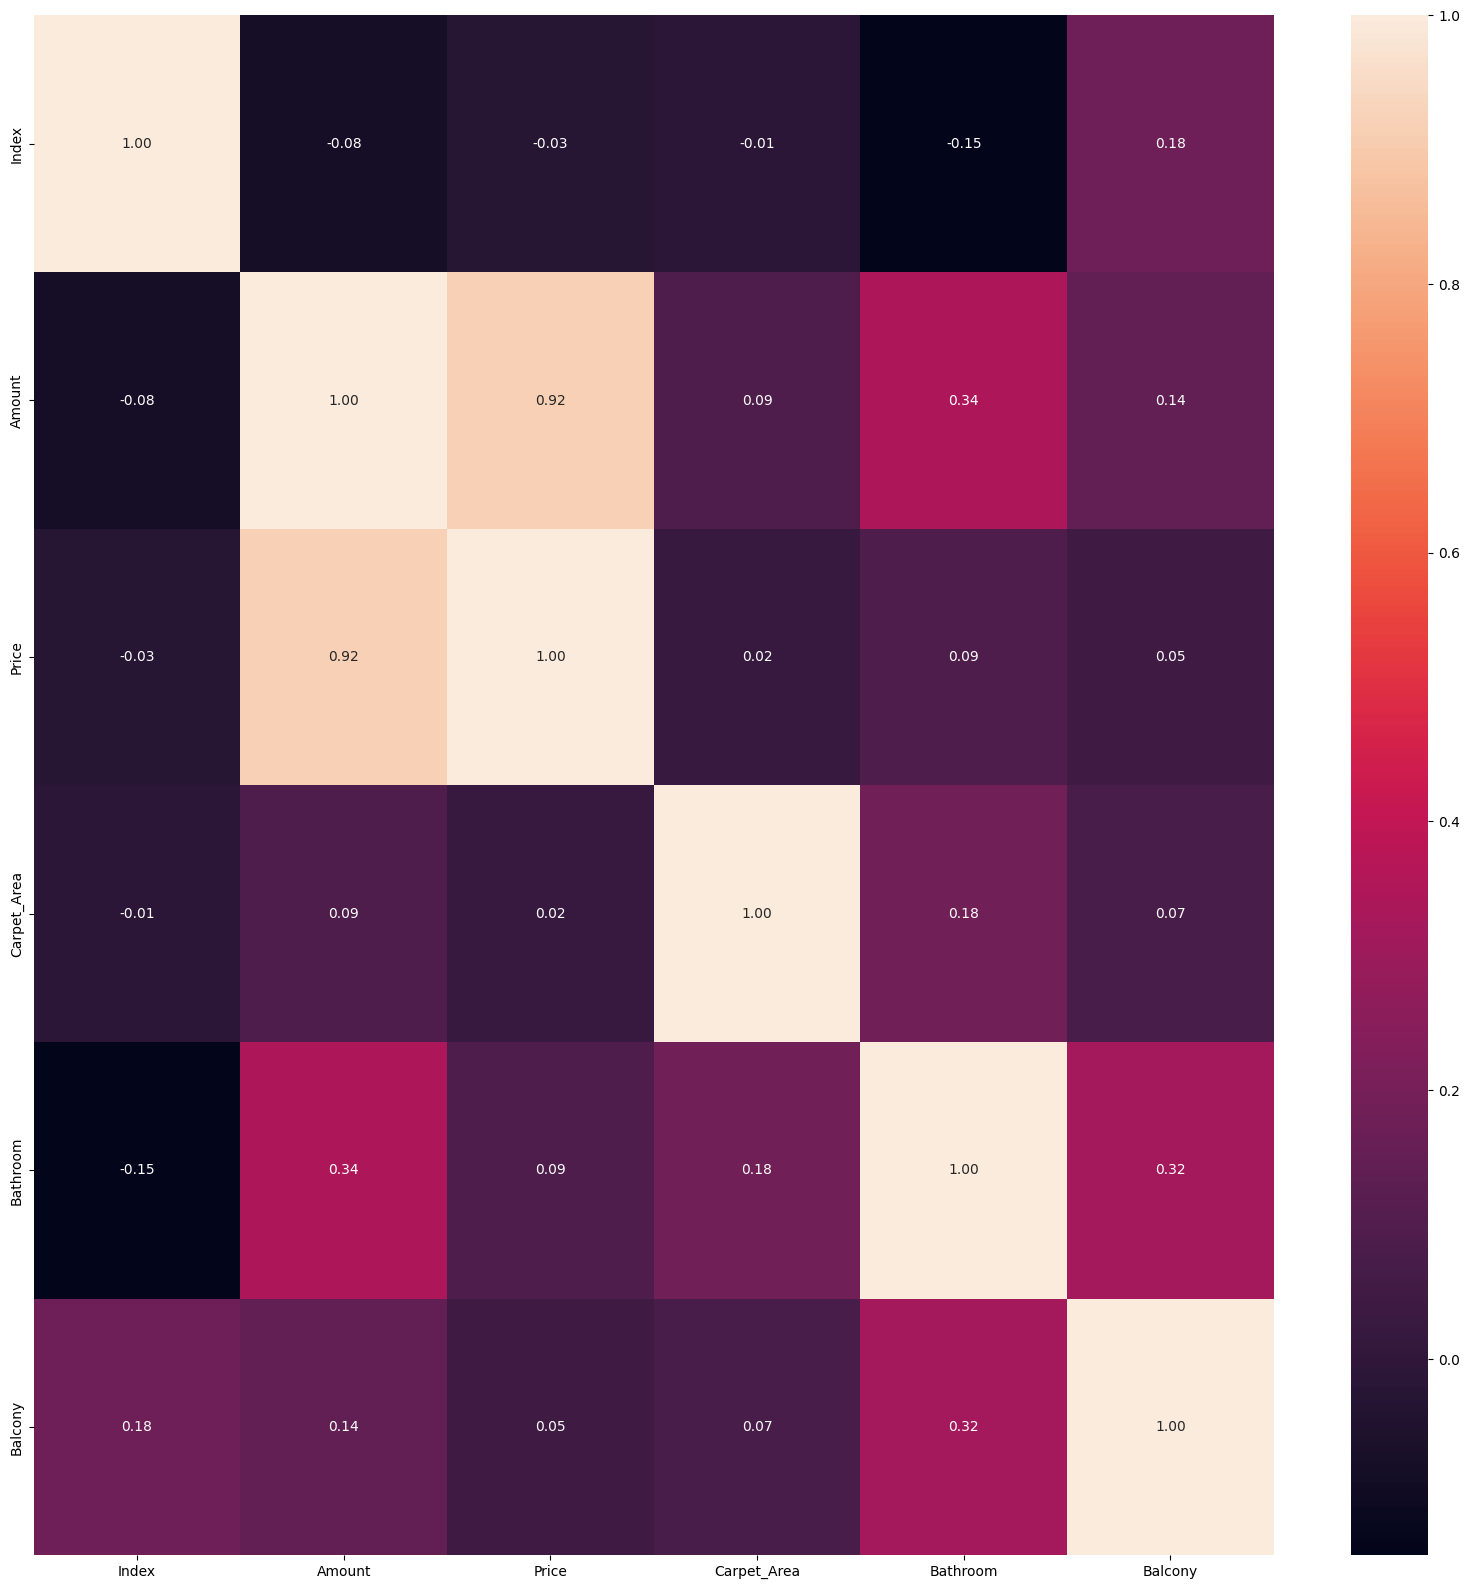

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
df.dropna(inplace=True)  # Remove rows with missing values

# Select only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

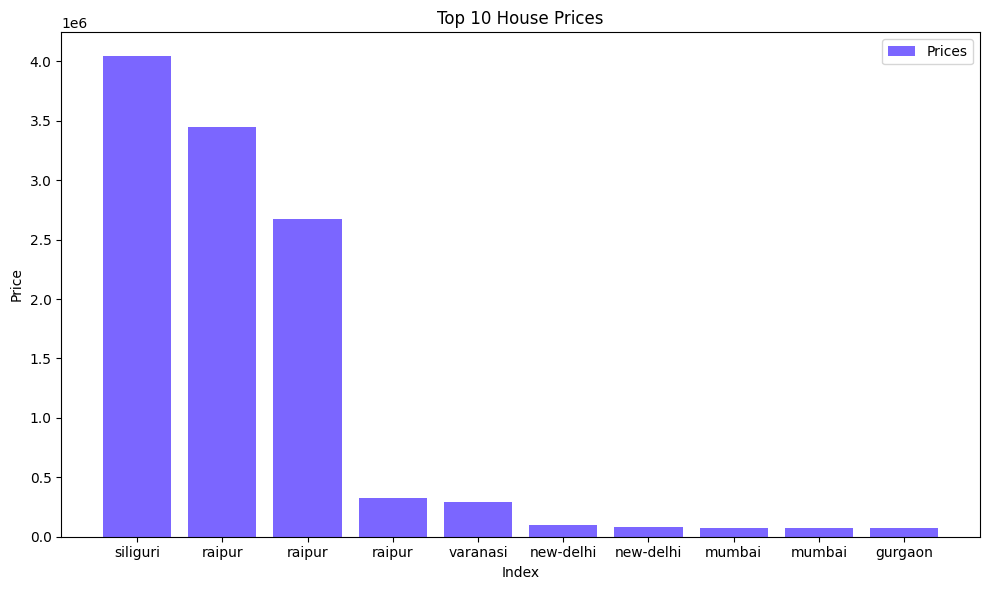

In [ ]:
top_prices = df['Price'].nlargest(10)
locations = df.loc[top_prices.index]['location']

# Plotting the top 10 prices using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_prices)), top_prices, color='#7B66FF')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend(['Prices'])
plt.title('Top 10 House Prices')
plt.xticks(range(len(top_prices)), locations)
plt.tight_layout()
plt.show()

**Calculate the Max 'Price' for each 'location' and sort in descending order**

In [ ]:
Max_price = df.groupby('location')['Price'].max().reset_index()
Max_price = Max_price.sort_values(by='Price', ascending=False)

# Select the top 10 locations with the highest average price
top_10_expensive_price = Max_price.head(10)

# Create a bar plot using Plotly Express
fig = px.bar(
    top_10_expensive_price,
    x='location',
    y='Price',
    color='Price',
    title='Top 10 Locations by Max Price',
    labels={'location': 'Location', 'Price': 'Max Price'},
    template='plotly_white'
)

fig.update_traces(textfont_color='black')

fig.update_layout(height=650)

fig.show()

**Calculate the value counts for each unique value in the 'location' column**

In [ ]:
top10_location = df['location'].value_counts()[:10]

# Create a bar plot using Plotly Express
fig = px.bar(
    y=top10_location.values,
    x=top10_location.index,
    color=top10_location.index,
    color_discrete_sequence=px.colors.sequential.PuBuGn,
    text=top10_location.values,
    title='Top 10 Locations',
    template='plotly_white'
)

# Update the layout of the plot
fig.update_layout(
    xaxis_title="Location",
    yaxis_title="Count",
    font=dict(size=17, family="Franklin Gothic")
)

fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



**Sunburst chart for the distribution of Furnishing**

In [ ]:
fig2 = px.sunburst(df, path=['Furnishing'], color_discrete_sequence=px.colors.qualitative.Set3)
fig2.update_layout(title_text='Distribution of Furnishing ', height=500)
fig2.show()

# Calculate the value counts for each unique value in the 'Furnishing' column
size = df['Furnishing'].value_counts()

**Bathroom counts**

In [ ]:
def barPlot(variable):
    var = df[variable]
    var_value = var.value_counts().reset_index()
    var_value.columns = [variable, 'Frequency']

    fig = px.bar(
        var_value,
        x=variable,
        y='Frequency',
        color=variable,
        color_discrete_sequence=px.colors.qualitative.Plotly,
        text='Frequency',
        title=variable,
    )

    fig.update_layout(
        xaxis_title=variable,
        yaxis_title="Frequency",
        font=dict(size=12, family="Arial"),
    )

    fig.show()

In [ ]:
variable_list =['Bathroom']

for x in variable_list:
    barPlot(x)

# Handling Categorical data

In [ ]:
# Select columns with object (categorical) data types
categorical_cols = df.select_dtypes(include='object').columns.tolist()

categorical_cols

['Title',
 'Description',
 'location',
 'Status',
 'Floor',
 'Transaction',
 'Furnishing',
 'facing',
 'overlooking',
 'Ownership']

In [ ]:
from sklearn.preprocessing import LabelEncoder

Cols_to_transform = ['location','Status','Floor','Transaction','Furnishing','facing','overlooking','Ownership']
# Initialize the LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to the selected numerical columns
for x in Cols_to_transform:
    df[x] = le.fit_transform(df[x])

# Now, your categorical columns (excluding column 0) have been converted to numerical values
df.head()

,Index,Title,Description,Amount,Price,location,Carpet_Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Bathroom,Balcony,Ownership
9,9,3 BHK Ready to Occupy Flat for sale in Pride P...,One can find this stunning 3 BHK flat for sale...,16000000.0,11150.0,67,9687.5100,0,451,1,2,0,0,3.0,1.0,1
13,13,4 BHK Ready to Occupy Flat for sale Hiranandan...,Creatively planned and constructed is a 4 BHK ...,42500000.0,17526.0,67,19590.2980,0,240,1,1,0,0,4.0,1.0,1
15,15,2 BHK Ready to Occupy Flat for sale in Puranik...,"Kasarvadavali, Thane has an appealing 2 BHK fl...",9000000.0,10000.0,67,7265.6325,0,38,0,2,2,1,2.0,1.0,1
16,16,1 BHK Ready to Occupy Flat for sale in Green W...,Have a look at this immaculate 1 BHK flat for ...,3700000.0,5736.0,67,6964.2433,0,570,0,2,0,0,1.0,2.0,1
21,21,2 BHK Ready to Occupy Flat for sale in Ashar E...,This gorgeous 2 BHK Flat is available for sale...,16500000.0,15000.0,67,7157.9935,0,176,1,2,0,0,2.0,2.0,1


In [ ]:
# Check Null values
df.isnull().sum()

Index          0
Title          0
Description    0
Amount         0
Price          0
location       0
Carpet_Area    0
Status         0
Floor          0
Transaction    0
Furnishing     0
facing         0
overlooking    0
Bathroom       0
Balcony        0
Ownership      0
dtype: int64

In [ ]:
df = df.dropna()

df.shape

(60515, 16)

# correlation matrix

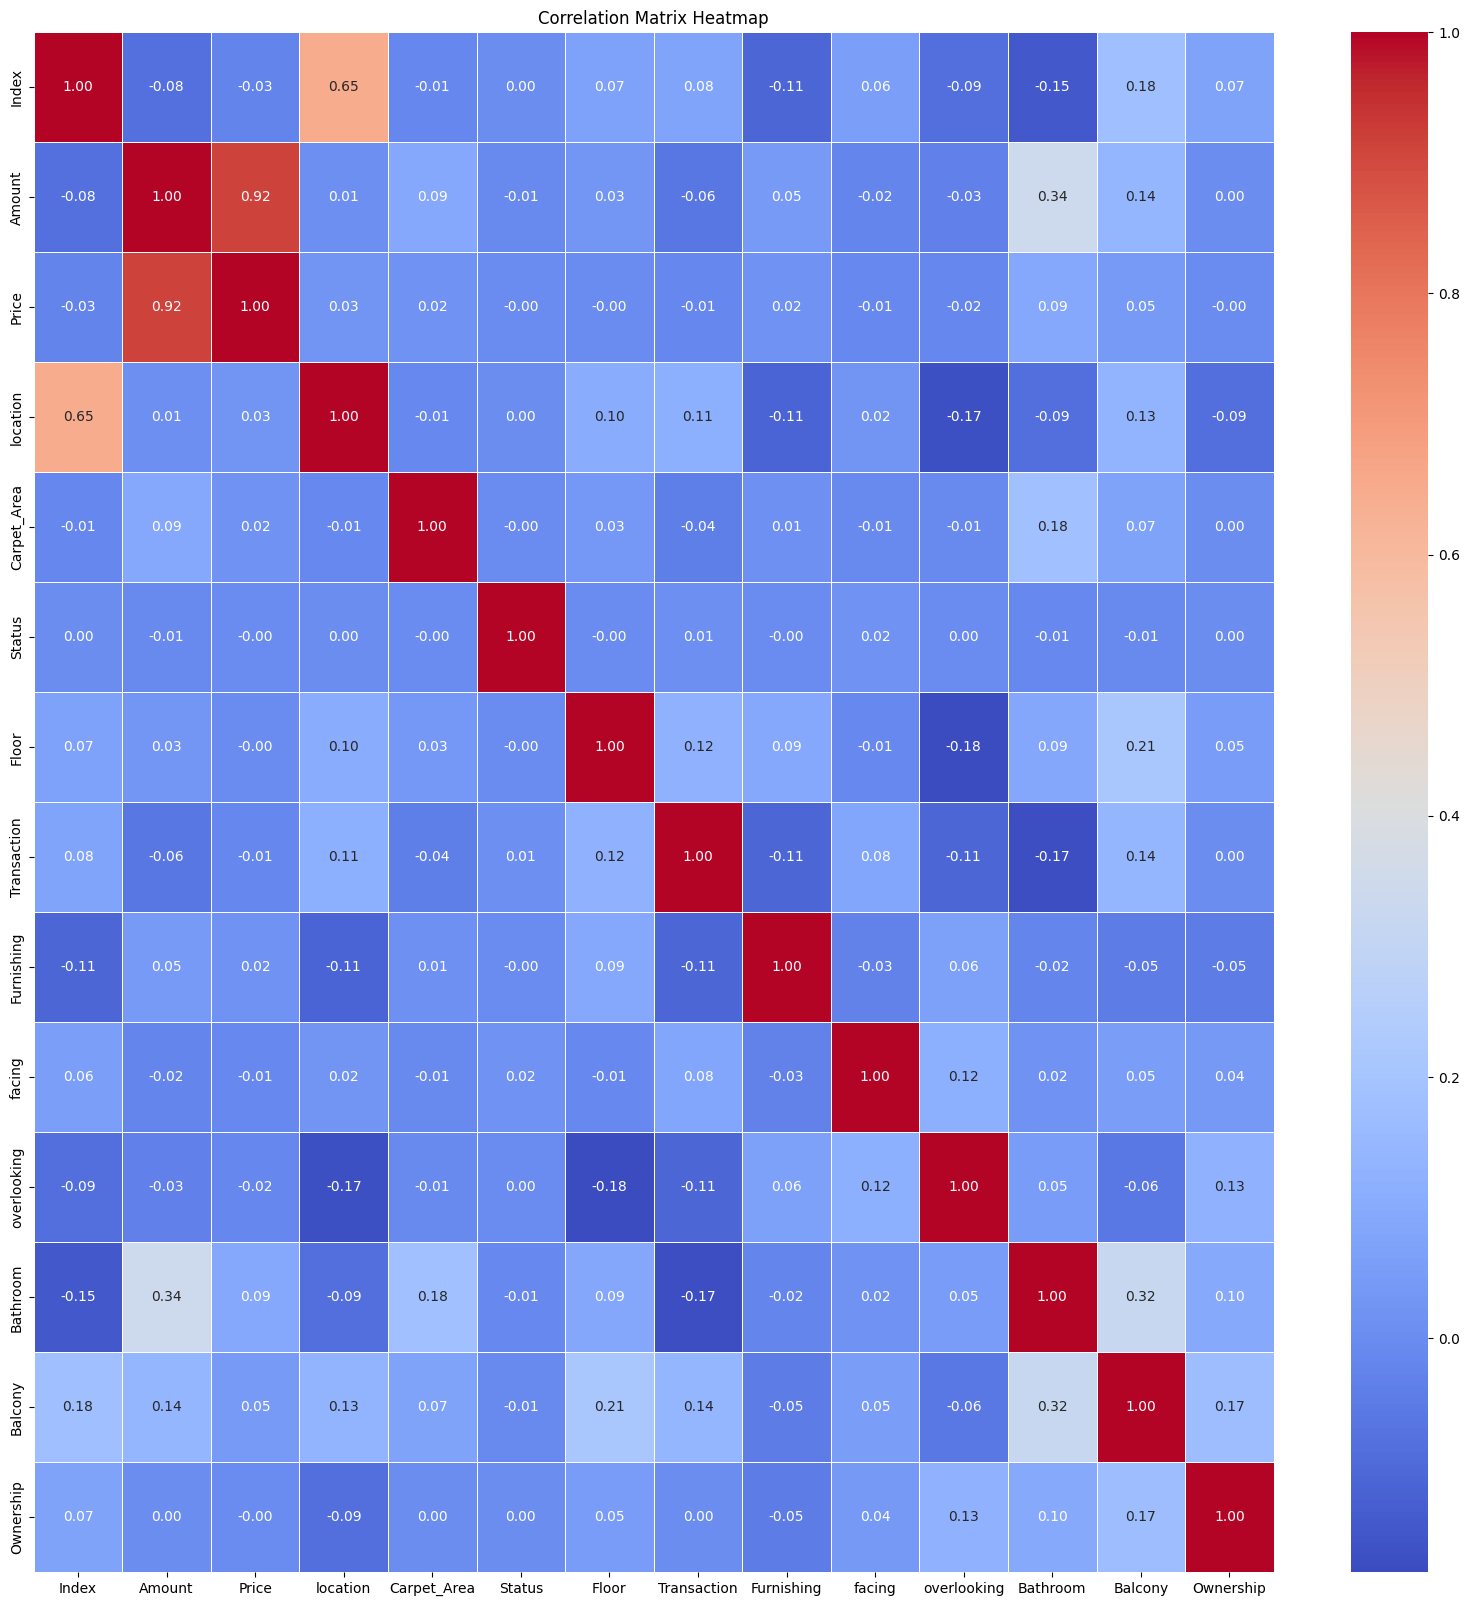

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
df.dropna(inplace=True)  # Remove rows with missing values

# Select only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Print top 5 most positively correlated features to the target variable 'Price'
print('Top 5 Most Positively Correlated to the Target Variable:')
print(corr_matrix['Price'].sort_values(ascending=False).head(5))

Top 5 Most Positively Correlated to the Target Variable:
Price       1.000000
Amount      0.916164
Bathroom    0.090722
Balcony     0.045727
location    0.027572
Name: Price, dtype: float64


In [ ]:
print('Top 5 Most Positively Correlated to the Target Variable')
print(corr_matrix['Price'].sort_values(ascending=False).head(5))

Top 5 Most Positively Correlated to the Target Variable
Price       1.000000
Amount      0.916164
Bathroom    0.090722
Balcony     0.045727
location    0.027572
Name: Price, dtype: float64


In [ ]:
print('Top 5 Most Negatively Correlated to the Target Variable')
corr_matrix['Price'].sort_values(ascending=True).head(5)

Top 5 Most Negatively Correlated to the Target Variable


Index         -0.026353
overlooking   -0.016960
Transaction   -0.014017
facing        -0.012334
Floor         -0.003143
Name: Price, dtype: float64

In [ ]:
columns_to_drop = [col for col in corr_matrix.columns if abs(corr_matrix.loc['Price', col]) < 0.3]
columns_to_drop

['Index',
 'location',
 'Carpet_Area',
 'Status',
 'Floor',
 'Transaction',
 'Furnishing',
 'facing',
 'overlooking',
 'Bathroom',
 'Balcony',
 'Ownership']

In [ ]:
df1=df.copy()
df1 = df1.drop(columns_to_drop, axis=1)
df1.shape

(60515, 4)

# Spliting the dataset

In [ ]:
df.head()

,Index,Title,Description,Amount,Price,location,Carpet_Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Bathroom,Balcony,Ownership
9,9,3 BHK Ready to Occupy Flat for sale in Pride P...,One can find this stunning 3 BHK flat for sale...,16000000.0,11150.0,67,9687.5100,0,451,1,2,0,0,3.0,1.0,1
13,13,4 BHK Ready to Occupy Flat for sale Hiranandan...,Creatively planned and constructed is a 4 BHK ...,42500000.0,17526.0,67,19590.2980,0,240,1,1,0,0,4.0,1.0,1
15,15,2 BHK Ready to Occupy Flat for sale in Puranik...,"Kasarvadavali, Thane has an appealing 2 BHK fl...",9000000.0,10000.0,67,7265.6325,0,38,0,2,2,1,2.0,1.0,1
16,16,1 BHK Ready to Occupy Flat for sale in Green W...,Have a look at this immaculate 1 BHK flat for ...,3700000.0,5736.0,67,6964.2433,0,570,0,2,0,0,1.0,2.0,1
21,21,2 BHK Ready to Occupy Flat for sale in Ashar E...,This gorgeous 2 BHK Flat is available for sale...,16500000.0,15000.0,67,7157.9935,0,176,1,2,0,0,2.0,2.0,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = df.drop(columns=['Price','Title','Description'])
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (48412, 13)
X_test shape: (12103, 13)
y_train shape: (48412,)
y_test shape: (12103,)


# Model Building and Analysis

In [ ]:
# pip install xgboost

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
}
best_model = None
best_r2 = 0

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate the model
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    submit = pd.DataFrame()
    submit['Price'] = y_test
    submit['Predict_Price'] = y_pred
    submit = submit.reset_index()
    r2 = r2_score(y_test, y_pred)
    if r2 > best_r2:
        best_r2 = r2
        best_model = model.__class__.__name__

    print(f'{model_name}:')
    print(f'R2 Score: {r2:.2f}')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
    print(submit.head(5))

    print('----------------------------------------')
print(f"The best performing model is: {best_model} with accuracy: {best_r2:.2f}")

Linear Regression:
R2 Score: 0.80
Mean Absolute Error (MAE): 3299.30
Root Mean Squared Error (RMSE): 11132.77
    index    Price  Predict_Price
0  176476   3200.0    3292.709338
1  132463  10500.0    9691.401661
2  154900   3500.0    3514.514544
3   94563   6189.0    4891.425164
4   66262   7143.0    1390.753704
----------------------------------------
Random Forest:
R2 Score: 0.97
Mean Absolute Error (MAE): 303.52
Root Mean Squared Error (RMSE): 4283.31
    index    Price  Predict_Price
0  176476   3200.0        3200.94
1  132463  10500.0       10500.00
2  154900   3500.0        3630.98
3   94563   6189.0        6189.00
4   66262   7143.0        7143.00
----------------------------------------
Gradient Boosting:
R2 Score: 0.85
Mean Absolute Error (MAE): 736.50
Root Mean Squared Error (RMSE): 9526.50
    index    Price  Predict_Price
0  176476   3200.0    3496.296058
1  132463  10500.0   10279.201788
2  154900   3500.0    3608.345850
3   94563   6189.0    6112.771667
4   66262   7143.0

In [ ]:
pip install gradio

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 80.7 MB/s eta 0:00:00:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.3/316.3 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 95.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 9.8 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl size=5584 sha256=343fc0da5c9df12d6b3c9b8ac65700bd419f95444044abed5ce1f696a32d418c
  Stored in directory: /root/.cache/pip/wheels/bd/65/9a/671fc6dcde07d4418df0c592f8df512b26d7a0029c2a23dd81
Successfully built ffmpy
  Attempting uninstall: websockets
    Found existing installation: websockets 12.0
    Uninstalling websockets-12.0:
      Successfully uninstalled websockets-12.0
  Attempting uninsta

In [ ]:
import numpy as np
import pandas as pd
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Preprocess data
def preprocess_data(df):
    label_encoders = {}
    categorical_cols = ['location', 'Furnishing', 'facing', 'overlooking', 'Ownership']
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

    X = df[['location', 'Carpet_Area', 'Furnishing', 'facing', 'overlooking', 'Bathroom', 'Balcony', 'Ownership']]
    y = df['Price']

    # Handle missing values in X
    imputer = SimpleImputer(strategy='mean')
    X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

    # Handle missing values in y
    y.fillna(y.mean(), inplace=True)

    return X, y, label_encoders, imputer

# Train model
def train_model(X_train, y_train):
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    joblib.dump(model, 'random_forest_model.pkl')
    return model

# Load model
def load_model():
    return joblib.load('random_forest_model.pkl')

# Property Classifier
class PropertyClassifier:
    def __init__(self, average_price, average_area):
        self.average_price = average_price
        self.average_area = average_area

    def classify(self, price, area):
        if price < self.average_price and area < self.average_area:
            return 'Cheap'
        elif price > self.average_price and area > self.average_area:
            return 'Expensive'
        else:
            return 'Average'

# Handle unseen labels
def handle_unseen_labels(le, labels):
    classes = list(le.classes_)
    for label in labels:
        if label not in classes:
            classes.append(label)
    le.classes_ = np.array(classes)
    return le.transform(labels)

# Predict and classify function
def predict_and_classify(Location, Carpet_Area, Furnishing, Facing, Overlooking, Bathroom, Balcony, Ownership, label_encoders, model, classifier, imputer):
    input_data = pd.DataFrame([[Location, Carpet_Area, Furnishing, Facing, Overlooking, Bathroom, Balcony, Ownership]],
                              columns=['location', 'Carpet_Area', 'Furnishing', 'facing', 'overlooking', 'Bathroom', 'Balcony', 'Ownership'])

    for col in ['location', 'Furnishing', 'facing', 'overlooking', 'Ownership']:
        le = label_encoders[col]
        input_data[col] = handle_unseen_labels(le, input_data[col])

    # Handle missing values
    input_data = pd.DataFrame(imputer.transform(input_data), columns=input_data.columns)

    predicted_price = model.predict(input_data)[0]
    classification = classifier.classify(predicted_price, Carpet_Area)

    # Create title and description
    title = f"Beautiful House with {Bathroom} Bathrooms"
    description = f"This house with {Bathroom} bathrooms is perfect for your family. "
    if Balcony > 0:
        description += f"It also features {Balcony} balconies, allowing you to enjoy the view."
    description += f" It has a carpet area of {Carpet_Area} sq.ft and is furnished with furnishing level {Furnishing}."

    # Extract Amount from the dataset for the given features (if available)
    amount_df = df[(df['location'] == Location) &
                   (df['Carpet_Area'] == Carpet_Area) &
                   (df['Furnishing'] == Furnishing) &
                   (df['facing'] == Facing) &
                   (df['overlooking'] == Overlooking) &
                   (df['Bathroom'] == Bathroom) &
                   (df['Balcony'] == Balcony) &
                   (df['Ownership'] == Ownership)]

    if not amount_df.empty:
        amount = amount_df['Amount'].values[0]
    else:
        amount = "N/A"  # If not found in the dataset

    return predicted_price, classification, title, description, amount

# Main function
if __name__ == "__main__":
    # Sample DataFrame creation (replace with actual data loading)
    data = {
        'location': ['A', 'B', 'A', 'C', 'B'],
        'Carpet_Area': [1200, 1500, 1100, 1400, 1600],
        'Furnishing': ['Furnished', 'Unfurnished', 'Semi-Furnished', 'Furnished', 'Unfurnished'],
        'facing': ['East', 'West', 'North', 'South', 'East'],
        'overlooking': ['Park', 'Road', 'Garden', 'Park', 'Road'],
        'Bathroom': [2, 3, 2, 4, 3],
        'Balcony': [1, 2, 1, 3, 2],
        'Ownership': ['Freehold', 'Leasehold', 'Freehold', 'Leasehold', 'Freehold'],
        'Price': [5000000, 7000000, 4500000, 8000000, 7500000],
        'Amount': [4800000, 6800000, 4300000, 7800000, 7300000]
    }
    df = pd.DataFrame(data)

    X, y, label_encoders, imputer = preprocess_data(df)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = train_model(X_train, y_train)

    average_price = df['Amount'].mean()
    average_area = df['Carpet_Area'].mean()
    classifier = PropertyClassifier(average_price, average_area)

    # Single input session
    location = input("Enter location: ")
    carpet_area = int(input("Enter carpet area (in sqft): "))
    furnishing = input("Enter furnishing (Furnished/Unfurnished/Semi-Furnished): ")
    facing = input("Enter facing direction (East/West/North/South): ")
    overlooking = input("Enter overlooking (Park/Road/Garden): ")
    bathroom = int(input("Enter number of bathrooms: "))
    balcony = int(input("Enter number of balconies: "))
    ownership = input("Enter ownership type (Freehold/Leasehold): ")

    predicted_price, classification, title, description, amount = predict_and_classify(location, carpet_area, furnishing, facing, overlooking, bathroom, balcony, ownership, label_encoders, model, classifier, imputer)

    print("\nRecommended House Price:", predicted_price)
    print("Property Classification:", classification)
    print("Title:", title)
    print("Description:", description)
    print("Amount:", amount)


Enter location:  alex
Enter carpet area (in sqft):  15200
Enter furnishing (Furnished/Unfurnished/Semi-Furnished):  Unfurnished
Enter facing direction (East/West/North/South):  South
Enter overlooking (Park/Road/Garden):  Garden
Enter number of bathrooms:  2
Enter number of balconies:  1
Enter ownership type (Freehold/Leasehold):  Leasehold



Recommended House Price: 6495000.0
Property Classification: Expensive
Title: Beautiful House with 2 Bathrooms
Description: This house with 2 bathrooms is perfect for your family. It also features 1 balconies, allowing you to enjoy the view. It has a carpet area of 15200 sq.ft and is furnished with furnishing level Unfurnished.
Amount: N/A


In [ ]:
import numpy as np
import pandas as pd
import gradio as gr
import fastapi
import typing_extensions
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

def preprocess_data(df):
    # Convert categorical features to numerical values
    label_encoders = {}
    categorical_cols = ['Furnishing', 'facing', 'overlooking', 'Ownership']  # Include only the necessary categorical columns
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

    # Return preprocessed features and labels
    X = df[['location', 'Carpet_Area', 'Furnishing', 'facing', 'overlooking', 'Bathroom', 'Balcony', 'Ownership']]  # Use only the specified columns
    y = df['Price']
    return X, y, label_encoders

def train_model(X_train, y_train):
    # Initialize the Random Forest Regressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    return model

def recommend_house_price(location, carpet_area, furnishing, facing, overlooking, bathroom, balcony, ownership):
    # Convert inputs to correct types
    location = int(location)
    carpet_area = float(carpet_area)
    furnishing = int(furnishing)
    facing = int(facing)
    overlooking = int(overlooking)
    bathroom = int(bathroom)
    balcony = int(balcony)
    ownership = int(ownership)

    # Preprocess input data
    features = np.array([[location, carpet_area, furnishing, facing, overlooking, bathroom, balcony, ownership]])
    features_df = pd.DataFrame(features, columns=['location', 'Carpet_Area', 'Furnishing', 'facing', 'overlooking', 'Bathroom', 'Balcony', 'Ownership'])

    # Predict house price
    predicted_price = model.predict(features_df)[0]

    # Create title and description
    title = f"Beautiful House with {bathroom} Bathrooms"
    description = f"This house with {bathroom} bathrooms is perfect for your family. "
    if balcony > 0:
        description += f"It also features {balcony} balconies, allowing you to enjoy the view."
    description += f" It has a carpet area of {carpet_area} sq.ft and is furnished with furnishing level {furnishing}."

    # Extract Amount from the dataset for the given features (if available)
    amount_df = df[(df['location'] == location) &
                   (df['Carpet_Area'] == carpet_area) &
                   (df['Furnishing'] == furnishing) &
                   (df['facing'] == facing) &
                   (df['overlooking'] == overlooking) &
                   (df['Bathroom'] == bathroom) &
                   (df['Balcony'] == balcony) &
                   (df['Ownership'] == ownership)]

    if not amount_df.empty:
        amount = amount_df['Amount'].values[0]
    else:
        amount = "N/A"  # If not found in the dataset

    return predicted_price, title, description, amount

# Main function to preprocess data and train the model
def main():
    global model, df, label_encoders

    # Preprocess data
    X, y, label_encoders = preprocess_data(df)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model = train_model(X_train, y_train)

# Call the main function to train the model
main()

# Create Gradio interface
inputs = [
    gr.Number(label="Location number"),
    gr.Number(label="Carpet area (in square feet)"),
    gr.Number(label="Furnishing number"),
    gr.Number(label="Facing number"),
    gr.Number(label="Overlooking number"),
    gr.Number(label="Number of bathrooms"),
    gr.Number(label="Number of balconies"),
    gr.Number(label="Ownership number")
]

outputs = [
    gr.Textbox(label="Predicted House Price"),
    gr.Textbox(label="Title"),
    gr.Textbox(label="Description"),
    gr.Textbox(label="Amount")
]

gr.Interface(
    fn=recommend_house_price,
    inputs=inputs,
    outputs=outputs,
    title="House Price Prediction",
    description="Enter the details of the house to get the predicted price, title, description, and amount."
).launch()


Running on local URL:  http://127.0.0.1:7860
Kaggle notebooks require sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Running on public URL: https://ccfd90f120f6730929.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [5]:
def appartment_classify(balcony, bathroom):
    # Construct the CLIPS command
    command = ['clips', '-f2']

    # Prepare the input for CLIPS
    clips_input = '\n'.join([
        '(load "/content/apartment.clp")',
        f'(assert (apartment (balconies {balcony}) (toilets {bathroom})))',
        '(run)',
        '(exit)'
    ])
    # Execute the CLIPS command
    result = subprocess.run(command, input=clips_input, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)

    # Process the output to find the classification
    classify = None
    for line in result.stdout.split('\n'):
        if "The apartment is classified as:" in line:
            classify = line.split(":")[1].strip()
            break
    return classify

In [6]:
#send input symptom to get the diagnosis
result = appartment_classify(balcony,bathroom)
print("The apartment is classified as:", result)

The apartment is classified as: Compact


In [11]:
def appartment_ranking(price, carpet_Area):
    # Construct the CLIPS command
    command = ['clips', '-f2']

    # Prepare the input for CLIPS
    clips_input = '\n'.join([
        '(load "/content/ranking.clp")',
        '(reset)',
        '(watch rules)',
        '(watch facts)',
        '(watch activations)',
        f"(assert (input (Price {price}) (Carpet_Area {carpet_Area})))",
        '(run)',
        '(exit)'
    ])

    # Execute the CLIPS command
    result = subprocess.run(command, input=clips_input, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)

    # Process the output to find the classification
    classify = None
    for line in result.stdout.split('\n'):
        if "Property classification" in line:
            classify = line.split(":")[1].strip()
            break

    return classify

In [14]:
result = appartment_ranking(price,carpet_area)
print("The Property is classified as:", result)

The Property is classified as: average
